## Project 5, Generalized Linear regression
[Lec08](https://github.com/qzhu2017/ComputationalPhysics300/blob/master/Lec_08_fitting.ipynb)
Write a wiki page to derive the math for linear regression and generalize it to polynomial regression. Choose a dataset to test the performance of regressions with order 1, 2, 3.

Suppose we are given an ideal function and a corresponding random function

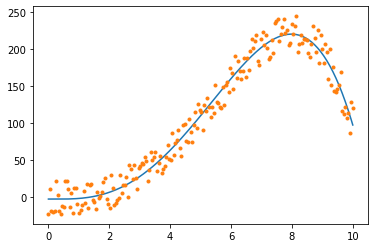

In [234]:
import numpy as np
import matplotlib.pyplot as plt
#Suppose we are given a random function and data set:

f = lambda x: (-.18*x**4 + 2*x**3 - 1*x**2 -3)

datapoints = 200
start = 0
end = 10


x = np.linspace(start, end, datapoints)
y = f(x)
y_rand = y + np.random.rand(datapoints)*50 -25

plt.plot(x, y)
plt.plot(x, y_rand, '.')
plt.show()

### Order 1
Our ultimate goal is to replicate the ideal function from the given the random function. 

We can try to replicate the ideal function with linear regression, or a simple line, which takes the form $ax+b$ on a 2-D Graph

In [211]:
linear_reg = lambda x, a, b: a*x+b 

Recall that we can determine the values of $a$ and $b$ by calculating the "error" and minimizing the error via the "Least Squares" approximation

$err = \sum_i^n((y_i - f(x_i)^2)$

If we minimize the partial derivatives of the error, we recall that we get:

$\frac{\partial{err}}{\partial{a}} = -2 \sum^{n}_{i}x_i(y_i-ax_i-b) = 0$

$\frac{\partial{err}}{\partial{b}} = -2 \sum^{n}_{i}(y_i-ax_i-b) = 0$


Which is equivalent to the equation, represented as $Ax = B$

$$\begin{bmatrix} n & \sum_i^n x_i \\ \sum_i^n x_i & \sum_i^n x^2_i \end{bmatrix} \begin{bmatrix} b \\ a\end{bmatrix} = \begin{bmatrix} \sum_i^n (y_i) \\ \sum_i^n (x_i*y_i)\end{bmatrix}$$


We can solve for the values, $a$ and $b$, by taking the inverse of the matrix, A on both sides. Leaving the equation $x = A^{-1} B$

In [212]:
#These are the values to reperesent the values of matrices A and B
x_1 = sum(x)
x_2 = sum(x**2)
y_1 = sum(y_rand)
y_2 = sum(x*y_rand)

print(
x_1,
x_2,
y_1,
y_2,
)

1000.0000000000001 6683.417085427135 20629.296494592854 146591.76766953536


In [213]:
#We can solve for the values a and b by taking the inverse of the matrix A

A = np.array([[datapoints, x_1], [x_1, x_2]])
B = np.array([[y_1],[y_2]])

print(A.shape)
print(B.shape)

x_vals = np.dot(np.linalg.inv(A),B)

a = x_vals[1]
b = x_vals[0]

print(a, b)

(2, 2)
(2, 1)
[25.80779628] [-25.89249893]


Now that we have the values for $a$ and $b$, we can estimate a graph of the ideal function we sought to replicate:

In [214]:
y_fit = linear_reg(x, a, b)

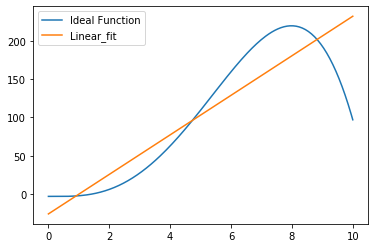

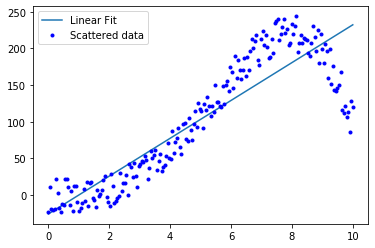

In [238]:
plt.plot(x,y, label = "Ideal Function")
plt.plot(x,y_fit, label = "Linear_fit")
plt.legend()
plt.show()

plt.plot(x,y_fit, label = "Linear Fit")
plt.plot(x, y_rand, ".b", label = "Scattered data")
plt.legend()
plt.show()

Although the values of linear regression have been optimized to the fullest, it is clear that a simple line can not mirror the ideal function. We now introduce polynomial regression, a generalized version of linear regression


## Polynomial Regression

### Order 2
Because linear regression, a formula represented by $ax+b$, can not properly fit the function, let us modify the original equation. Instead, let the formula be of order 2: $ax^2+bx+c$.

Now, $err = \sum_i^n (y_i-f(x)_i)^2 = \sum_i^n (y_i-(ax_i^2+bx_i+c))^2$

where the following conditions must be satisfied/minimized:

$\frac{\partial{err}}{\partial{c}} = -2\sum_i^n (y_i-(ax_i^2+bx_i+c)) = 0$ 

$\frac{\partial{err}}{\partial{b}} = -2\sum_i^n x_i(y_i-(ax_i^2+bx_i+c)) = 0$

$\frac{\partial{err}}{\partial{a}} = -2\sum_i^n x_i^2(y_i-(ax_i^2+bx_i+c)) = 0$


In [216]:
poly_reg_2 = lambda x, a, b, c: a*x**2 + b*x + c

What this implies is that we can simplify the equation into the following formula:


$$\begin{bmatrix} \sum_i^n x_i^2  & \sum_i^n x_i & n \\ \sum_i^n x_i^3 & \sum_i^n x^2_i & \sum_i^n x_i \\ \sum_i^n x_i^4 & \sum_i^n x_i^3 & \sum_i^n x_i^2 \end{bmatrix} \begin{bmatrix} a \\ b \\ c\end{bmatrix} = \begin{bmatrix} \sum_i^n (y_i) \\ \sum_i^n (x_i*y_i) \\ \sum_i^n (x_i^2*y_i) \end{bmatrix}$$

We can solve this once again to find the values of $a$, $b$, and $c$, which results in:

In [217]:
y_1 = sum(y_rand)
y_2 = sum(y_rand*x)
y_3 = sum((x**2)*y)

x_0 = datapoints
x_1 = sum(x)
x_2 = sum(x**2)
x_3 = sum(x**3)
x_4 = sum(x**4)

#Constructing Ax = B equation
A = np.array([[x_2, x_1, x_0], [x_3, x_2, x_1], [x_4, x_3, x_2]])
B = np.array([[y_1],[y_2],[y_3]])

print(A.shape, B.shape)

(3, 3) (3, 1)


In [218]:

x_poly_2 = np.dot(np.linalg.inv(A),B)
print(x_poly_2)

[[ -1.8292323 ]
 [ 44.10011924]
 [-56.22650183]]


In [219]:
a = x_poly_2[0]
b = x_poly_2[1]
c = x_poly_2[2]

print(a, b, c)

y_fit_2 = poly_reg_2(x, a, b, c)


[-1.8292323] [44.10011924] [-56.22650183]


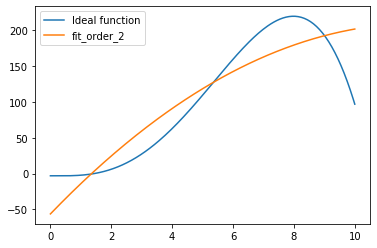

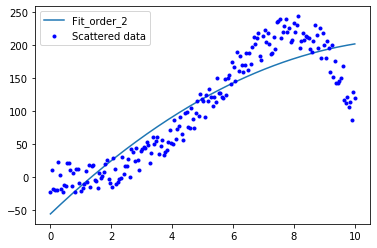

In [243]:
plt.plot(x, y, label = "Ideal function")
plt.plot(x,y_fit_2, label = "fit_order_2")
plt.legend()
plt.show()

plt.plot(x,y_fit_2, label = "Fit_order_2")
plt.plot(x, y_rand, ".b", label = "Scattered data")
plt.legend()
plt.show()

### Order 3
This is much better than our linear regression model! Unfortunately, it could be much more accurate. Perhaps it would be wise to add an additional order to the polynomial:

Let the polynomial formula be of order 3: $a_0x^3+a_1x^2+a_2x+a_3$.

In [221]:
poly_reg_3 = lambda x, a_0, a_1, a_2, a_3: a_0*(x**3)+a_1*(x**2)+a_2*x+a_3


Now, $error = \sum_i^n (y_i-f(x)_i)^2 = \sum_i^n (y_i-(a_0x^3_i+a_1x^2_i+a_2x_i+a_3))^2$

where the following conditions must be satisfied/minimized:

$\frac{\partial{err}}{\partial{a_3}} = -2\sum_i^n (y_i-(a_0x^3_i+a_1x^2_i+a_2x_i+a_3)) = 0$ 

$\frac{\partial{err}}{\partial{a_2}} = -2\sum_i^n x_i(y_i-(a_0x^3_i+a_1x^2_i+a_2x_i+a_3)) = 0$

$\frac{\partial{err}}{\partial{a_1}} = -2\sum_i^n x_i^2(y_i-(a_0x^3_i+a_1x^2_i+a_2x_i+a_3)) = 0$

$\frac{\partial{err}}{\partial{a_0}} = -2\sum_i^n x_i^3(y_i-(a_0x^3_i+a_1x^2_i+a_2x_i+a_3)) = 0$


Which results in the following matrice equation:
$$\begin{bmatrix} \sum_i^n x_i^3 & \sum_i^n x_i^2  & \sum_i^n x_i & n \\ \sum_i^n x_i^4 & \sum_i^n x_i^3 & \sum_i^n x^2_i & \sum_i^n x_i \\ \sum_i^n x_i^5 & \sum_i^n x_i^4 & \sum_i^n x_i^3 & \sum_i^n x_i^2 \\  \sum_i^n x_i^6 & \sum_i^n x_i^5 & \sum_i^n x_i^4 & \sum_i^n x_i^3 \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \\ a_2 \\ a_3 \end{bmatrix} = \begin{bmatrix} \sum_i^n (y_i) \\ \sum_i^n (x_i*y_i) \\ \sum_i^n (x_i^2*y_i) \\ \sum_i^n (x_i^3*y_i) \end{bmatrix}$$


If we once again attempt to solve this, we get the following equation: 

In [222]:
x_0 = datapoints
x_1 = sum(x)
x_2 = sum(x**2)
x_3 = sum(x**3)
x_4 = sum(x**4)
x_5 = sum(x**5)
x_6 = sum(x**6)

y_0 = sum(y_rand)
y_1 = sum(x* y_rand)
y_2 = sum(x**2 * y_rand)
y_3 = sum(x**3 * y_rand)

#Constructing Ax = B equation

A = np.array([[x_3, x_2, x_1, x_0], [x_4, x_3, x_2, x_1], [x_5, x_4, x_3, x_2], [x_6, x_5, x_4, x_3]])
B = np.array([[y_0],[y_1],[y_2],[y_3]])

In [223]:
x_poly_3 = np.dot(np.linalg.inv(A),B)
print(x_poly_3)

a_0 = x_poly_3[0]
a_1 = x_poly_3[1]
a_2 = x_poly_3[2]
a_3 = x_poly_3[3]

[[ -1.73107564]
 [ 24.0216941 ]
 [-58.35224562]
 [ 27.1163337 ]]


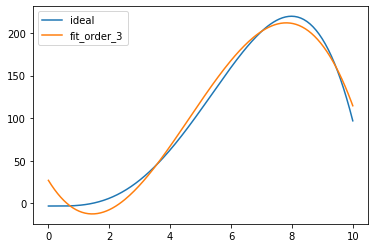

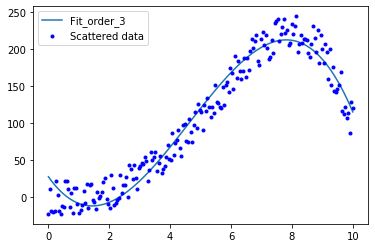

In [244]:
y_fit_3 = poly_reg_3(x, a_0, a_1, a_2, a_3)


plt.plot(x, y, label = "ideal")
plt.plot(x,y_fit_3, label = "fit_order_3")
plt.legend()
plt.show()

plt.plot(x,y_fit_3, label = "Fit_order_3")
plt.plot(x, y_rand, ".b", label = "Scattered data")
plt.legend()
plt.show()

### Order N

The higher the order of polynomial regression, the closer we are to creating an accurate model of our proposed function. The following points are conclusions from this project:

1) A high-order polynomial will most definitely fit the function with higher accuracy, and we can recall the general formula for polynomial regression from Lecture 04:

$$
\begin{pmatrix}
       n       & \sum x_i       & \sum x_i^2     &... &\sum x_i^j     \\
    \sum x_i   & \sum x_i^2     & \sum x_i^3     &... &\sum x_i^{j+1} \\
    \sum x_i^2 & \sum x_i^3     & \sum x_i^4     &... &\sum x_i^{j+2} \\
               &                &                &... &\\
    \sum x_i^j & \sum x_i^{j+1} & \sum x_i^{j+2} &... &\sum x_i^{j+j} 
\end{pmatrix}
\begin{pmatrix}
    a_0   \\
    a_1   \\
    a_2   \\
     ...  \\
    a_j 
\end{pmatrix}
=
\begin{pmatrix}
    \sum y_i   \\
    \sum (x_iy_i)   \\
    \sum (x_i^2y_i) \\
            ...   \\
    \sum (x_i^jy_i) 
\end{pmatrix}
$$


2) On the other hand, A high-order polynomial will take prodigious CPU resources, and will take a much longer time to compute than a typical linear regression.

